In [4]:
# Clusterisation example with kaggle Mall Customers file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans




In [6]:
data=pd.read_csv('Mall_Customers.csv', index_col=0)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [7]:
# Using K-means

# Categorical data like Male and Female - need to be converted into encoding variable
# Label encoding vs one-hot encoding link: http://medium.com/aimonks/Label-encoding-vs-one-hot-encoding
# Ordinal categorical variable has some order like score satisfied/satisfied vs nominal variable (no order like brown or whote hair)
label_encoded_data = data
label_encoded_data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
label_encoded_data.head()



,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [9]:
onehot_encoded_data = data
onehot_encoded_data = pd.get_dummies(data, columns = ['Gender'])
onehot_encoded_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
CustomerID,,,,,
1,19,15,39,True,False
2,21,15,81,True,False
3,20,16,6,False,True
4,23,16,77,False,True
5,31,17,40,False,True


In [10]:
# renaming Gender_0 and Gender_1 columns

onehot_encoded_data.rename(columns = {'Gender_0':'Male','Gender_1': 'Female'})
onehot_encoded_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
CustomerID,,,,,
1,19,15,39,True,False
2,21,15,81,True,False
3,20,16,6,False,True
4,23,16,77,False,True
5,31,17,40,False,True


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

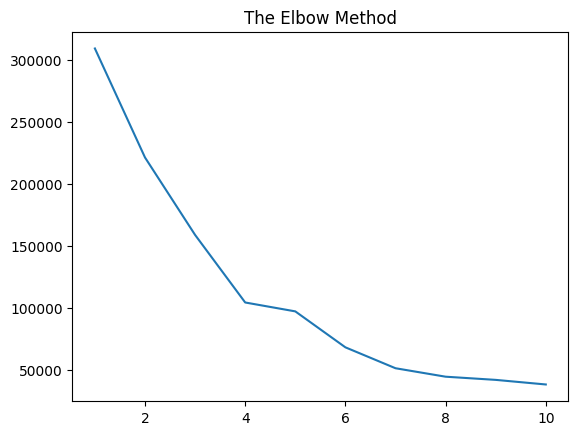

In [11]:
# ElbowMethod and Silhouette method
# Deciding the number of clusters k, use elbow method, within-clusters sume of squares - distances btw data points and their centroids

wcss = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(onehot_encoded_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel



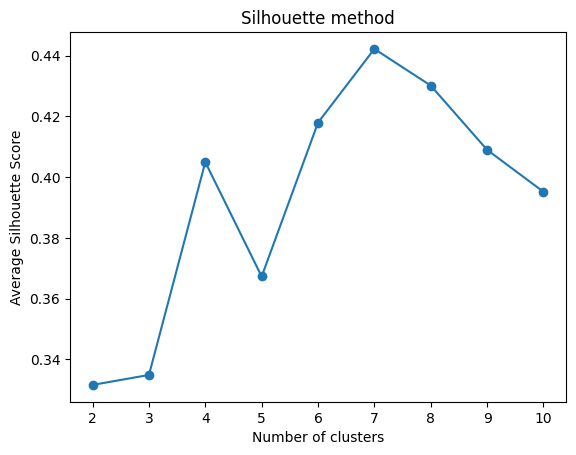

In [22]:
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(onehot_encoded_data)

    silhouette_avg = silhouette_score(onehot_encoded_data,kmeans.labels_)

    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11),silhouette_scores,marker='o')
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

In [23]:
kmeans=KMeans(n_clusters=6,random_state=42)
kmeans.fit(onehot_encoded_data)

KMeans(n_clusters=6, random_state=42)

In [25]:
onehot_encoded_data['Cluster'] = kmeans.labels_
onehot_encoded_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1,Cluster
CustomerID,,,,,,
1,19,15,39,True,False,5
2,21,15,81,True,False,2
3,20,16,6,False,True,5
4,23,16,77,False,True,2
5,31,17,40,False,True,5


In [19]:
cluster_groups = onehot_encoded_data.groupby('Cluster')
cluster_groups.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1,Cluster
CustomerID,,,,,,
1,19,15,39,True,False,5
2,21,15,81,True,False,2
3,20,16,6,False,True,5
4,23,16,77,False,True,2
5,31,17,40,False,True,5
6,22,17,76,False,True,2
7,35,18,6,False,True,5
8,23,18,94,False,True,2
9,64,19,3,True,False,5
